In [1]:
%cd ..

/home/maximilian/docker_home/geant4ScintSim/analysis


In [2]:
import json

import pythonSimHelper as psh

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
from numpy import unravel_index


In [3]:
#file = open("../../../out_75deg.json")
file = open("../../../output/60deg/32mm/40mm/output.json")
#file = open("../../../output/0deg/2mm/10mm/output.json")

In [4]:
# returns JSON object as 
# a dictionary
data = json.load(file)

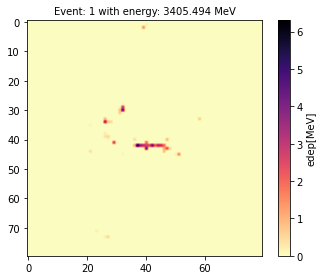

In [5]:
_ = psh.plotEvent(1, data)

In [6]:
data_dict = psh.calcObservablesReduced(data)

Number of events with no energy deposition:  432


Number of events with no energy deposition:  432


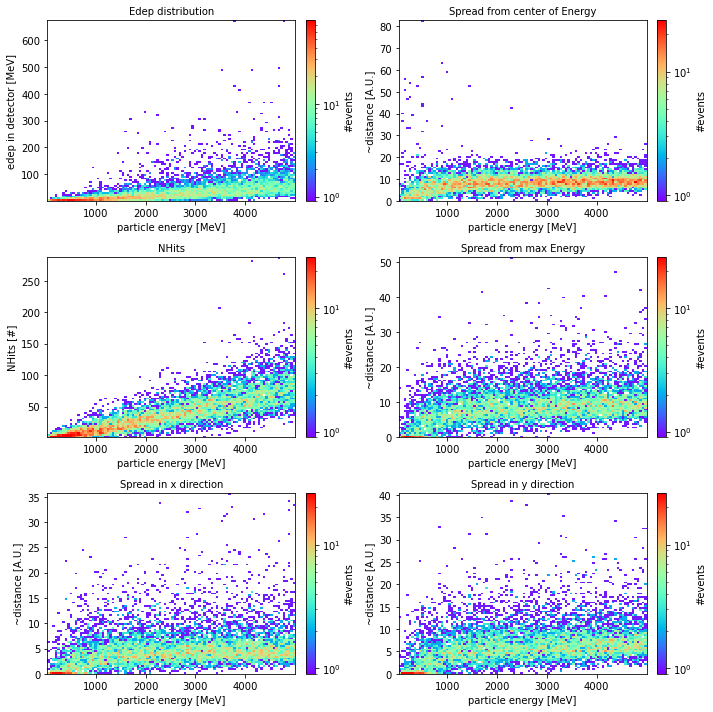

In [7]:
data_dictO = psh.calcObservables(data)
psh.plotObservables(data_dictO)

Number of events with no energy deposition:  432


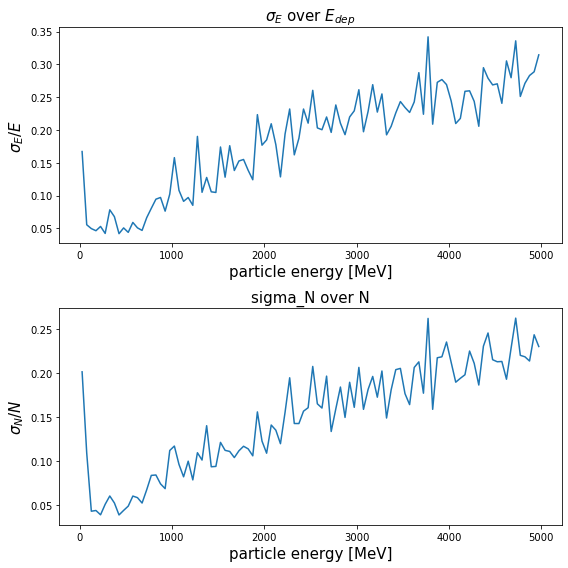

In [8]:
data_dict = psh.calcObservablesReduced(data)
psh.plotSigmaOverObs(data_dict)

In [9]:
def calcMeanSOO(data):
    
    data_dict = psh.calcObservablesReduced(data)
    
    eparticle_data = np.array(data_dict["eparticle"])
    edep_data = np.array(data_dict["edep"])
    numberofhits_data = np.array(data_dict["numberofhits"])

    H_NHits, x_edges_NHits, y_edges_NHits = np.histogram2d(eparticle_data, numberofhits_data, bins=100, range=[[0,5000],[0, np.mean(numberofhits_data)*3]])
    H_edep, x_edges_edep, y_edges_edep = np.histogram2d(eparticle_data, edep_data, bins=100, range=[[0,5000],[0, np.mean(edep_data)*3]])

    
    ycenters = (y_edges_edep[:-1] + y_edges_edep[1:]) / 2
    xcenters = (x_edges_edep[:-1] + x_edges_edep[1:]) / 2

    ycenters_NH = (y_edges_NHits[:-1] + y_edges_NHits[1:]) / 2
    xcenters_NH = (x_edges_NHits[:-1] + x_edges_NHits[1:]) / 2
    
    sigmaOEnergy = []
    for i in range(len(H_edep.T[0])):
        mean = np.average(ycenters, weights=H_edep[i])
        var = np.average((ycenters - mean)**2, weights=H_edep[i])
        sig = np.sqrt(var)

        sigOEnergy = sig/sum(H_edep[i])
        sigmaOEnergy.append(sigOEnergy)

    sigmaONHits = []
    for i in range(len(H_NHits.T[0])):
        mean = np.average(ycenters_NH, weights=H_NHits[i])
        var = np.average((ycenters_NH - mean)**2, weights=H_NHits[i])
        sig = np.sqrt(var)

        sigOHits = sig/sum(H_NHits[i])
        sigmaONHits.append(sigOHits)
        
    meanSON = np.mean(sigmaONHits)
    meanSOE = np.mean(sigmaOEnergy)
    
    return meanSOE, meanSON

In [10]:
meanSOE = []
meanSON = []

import os
rootdir = '../../../output/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        print(os.path.join(subdir, file))
        file = open(os.path.join(subdir, file))
        data = json.load(file)
        SOE, SON = calcMeanSOO(data)
        meanSOE.append(SOE)
        meanSON.append(SON)
        print("SON:", SON)

../../../output/0deg/2mm/10mm/output.json
Number of events with no energy deposition:  29
SON: 0.13871708854914275
../../../output/0deg/2mm/20mm/output.json
Number of events with no energy deposition:  40
SON: 0.13351063843815617
../../../output/0deg/2mm/30mm/output.json
Number of events with no energy deposition:  26
SON: 0.13286097210205075
../../../output/0deg/2mm/40mm/output.json
Number of events with no energy deposition:  31
SON: 0.131914337446693
../../../output/0deg/12mm/10mm/output.json
Number of events with no energy deposition:  56
SON: 0.3279764163767722
../../../output/0deg/12mm/20mm/output.json
Number of events with no energy deposition:  54
SON: 0.3669081931018407
../../../output/0deg/12mm/30mm/output.json
Number of events with no energy deposition:  54
SON: 0.3978016214118665
../../../output/0deg/12mm/40mm/output.json
Number of events with no energy deposition:  60
SON: 0.4135499162491438
../../../output/0deg/22mm/10mm/output.json
Number of events with no energy deposit

Number of events with no energy deposition:  58
SON: 0.5123808168744253
../../../output/40deg/22mm/10mm/output.json
Number of events with no energy deposition:  108
SON: 0.27674446102853023
../../../output/40deg/22mm/20mm/output.json
Number of events with no energy deposition:  96
SON: 0.35799809487731205
../../../output/40deg/22mm/30mm/output.json
Number of events with no energy deposition:  117
SON: 0.41364579636167703
../../../output/40deg/22mm/40mm/output.json
Number of events with no energy deposition:  135
SON: 0.4527735674575535
../../../output/40deg/32mm/20mm/output.json
Number of events with no energy deposition:  254
SON: 0.23960893009041612
../../../output/40deg/32mm/30mm/output.json
Number of events with no energy deposition:  228
SON: 0.26772937582348905
../../../output/40deg/32mm/40mm/output.json
Number of events with no energy deposition:  260
SON: 0.2823862173745546
../../../output/50deg/2mm/10mm/output.json
Number of events with no energy deposition:  21
SON: 0.2449984

In [11]:
#plt.plot(meanSOE)

In [12]:
#plt.plot(meanSON)